In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [160]:
data = pd.read_csv("ex1data2.txt", names=["x1","x2","y"])

In [161]:
data.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [162]:
X = data.iloc[:,:-1] # 47x2
y = np.array(data['y']).reshape(m,1) # 47x1
m = data.shape[0] # rows
n = data.shape[1] # features

### Feature normalization *(x-mu)/std*

In [163]:
def feature_normalize(X):
    
    mu = X.mean()
    sigma = X.std()
    X = (X - mu)/sigma
    
    return X, mu, sigma

In [164]:
X, mu, sigma = feature_normalize(X)

In [165]:
# update X by adding ones as x0
x0 = np.ones((m,1))
X = np.hstack((x0, X))

### Parameters

In [166]:
alpha = 0.3
num_iters = 400
theta = np.zeros((n,1)) # 3x1
theta = theta.astype('float64')

### Gradient descent

In [167]:
# cost function J
def J(X, y, theta):
    std_err = np.dot(X,theta) - y
    return np.squeeze(1/(2*m) * np.dot(std_err.T, std_err))


def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    
    for i in range(num_iters):
        std_err = np.dot(X,theta) - y # 47x1
        theta = theta - (1/m) * alpha * np.dot(std_err.T, X).T
        J_history.append(J(X, y, theta))
    
    return theta, J_history

In [168]:
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

In [169]:
theta

array([[340412.65957447],
       [110631.05027885],
       [ -6649.47427082]])

In [170]:
# estimated price for x1 = 1650(sq. feet), x2 = 3(br. house)

# normalizing features
x1 = (1650 - mu[0])/sigma[0]
x2 = (3 - mu[1])/sigma[1]

price = theta[0] + theta[1]*x1 + theta[2]*x2
print(price)

[293081.4643349]


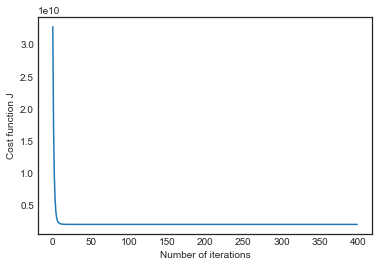

In [171]:
plt.plot(range(0,num_iters), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function J')
plt.show()

### Selecting different learning rates 
#### *0.1 - 0.03 - 0.01*

[[340412.65957447]
 [110631.04895815]
 [ -6649.47295013]]


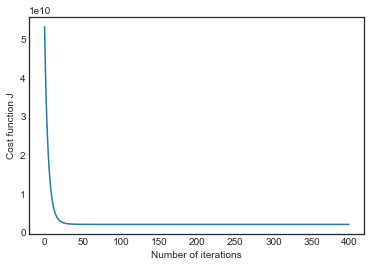

In [172]:
alpha = 0.1
num_iters = 400
theta = np.zeros((n,1)) # 3x1
theta = theta.astype('float64')

theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

print(theta)

plt.plot(range(0,num_iters), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function J')
plt.show()

[[340410.91897274]
 [110308.11337059]
 [ -6326.5381075 ]]


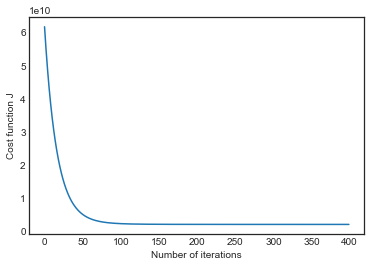

In [173]:
alpha = 0.03
num_iters = 400
theta = np.zeros((n,1)) # 3x1
theta = theta.astype('float64')

theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

print(theta)

plt.plot(range(0,num_iters), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function J')
plt.show()

[[334302.06399328]
 [100087.11600585]
 [  3673.54845093]]


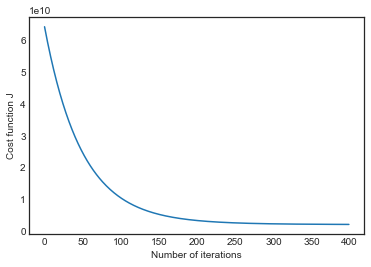

In [174]:
alpha = 0.01
num_iters = 400
theta = np.zeros((n,1)) # 3x1
theta = theta.astype('float64')

theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

print(theta)

plt.plot(range(0,num_iters), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function J')
plt.show()